## Importing Necessary modules

In [1]:
import os
import cv2
import numpy as np

import random
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from  tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Loading Data

In [3]:
images_yes = []
for filename in os.listdir('brain_tumor_dataset/yes'):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join('brain_tumor_dataset/yes', filename)
        img = cv2.imread(img_path)
        images_yes.append(img)


In [4]:
images_no = []
for filename in os.listdir('brain_tumor_dataset/no'):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join('brain_tumor_dataset/no', filename)
        img = cv2.imread(img_path)
        images_no.append(img)

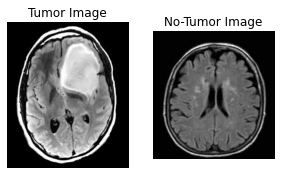

In [5]:
plt.figure(figsize=[10,5])

plt.subplot(141)
plt.imshow(cv2.cvtColor(images_yes[6], cv2.COLOR_BGR2RGB))
plt.title('Tumor Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(cv2.cvtColor(images_no[6], cv2.COLOR_BGR2RGB))
plt.title('No-Tumor Image')
plt.axis('off')

plt.show()

## Cropping Brain from Images

In [6]:

def crop_imgs(images):
    croped=[]
    for i in images:
        gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
        # binary thresholding
        _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        # finding the contours
        contours, _ = cv2.findContours(binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # contour with the largest area
        max_contour = max(contours, key=cv2.contourArea)
        #bounding rect
        x, y, w, h = cv2.boundingRect(max_contour)        
        croped.append(i[y:y+h, x:x+w])

    return croped

cropped_imgs_yes=crop_imgs(images_yes)
cropped_imgs_no=crop_imgs(images_no)



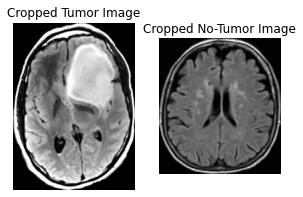

In [7]:
plt.figure(figsize=[10,5])

plt.subplot(141)
plt.imshow(cv2.cvtColor(cropped_imgs_yes[6], cv2.COLOR_BGR2RGB))
plt.title('Cropped Tumor Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(cv2.cvtColor(cropped_imgs_no[6], cv2.COLOR_BGR2RGB))
plt.title('Cropped No-Tumor Image')
plt.axis('off')

plt.show()

## Data Augmentation

In [8]:
datagen=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.1, 1.5],
)

In [9]:
def yesgen(x):
    i=0
    for batch in datagen.flow(x,batch_size=1,save_to_dir='aug_data/yes',save_prefix='yes',save_format='jpg',):
        i+=1
        if i>=5:
            break

def nogen(x):
    i=0
    for batch in datagen.flow(x,batch_size=1,save_to_dir='aug_data/no',save_prefix='no',save_format='jpg',):
        i+=1
        if i>=5:
            break

In [10]:
for i in cropped_imgs_yes:
    x=img_to_array(i)
    x=x.reshape((1,)+x.shape)
    yesgen(x)



In [11]:
for j in cropped_imgs_no:
    x=img_to_array(j)
    x=x.reshape((1,)+x.shape)
    nogen(x)